<a href="https://colab.research.google.com/github/Nada-Emad-Omar/IDC_Breast_Cancer_CNN.ipynb/blob/main/IDC_Breast_Cancer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadaemad11","key":"6575e7d7d22cd992f125d3409c52e6e0"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
breast-histopathology-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Unzip
!unzip breast-histopathology-images.zip -d ./Breast_Histology

Streaming output truncated to the last 5000 lines.
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: ./Breast_Histology/IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_cl

In [11]:
import os
import shutil
import random

data_dir = 'Breast_Histology/IDC_regular_ps50_idx5'
train_dir = './IDC_train'
val_dir = './IDC_val'
test_dir = './IDC_test'

In [12]:
# ============================
# Create Train/Val Split by Patients
# ============================

# Function to copy patches
def copy_patches(patient_list, dest_dir):
    for patient in patient_list:
        for c in ['0','1']:
            src_folder = os.path.join(data_dir, patient, c)
            dest_folder = os.path.join(dest_dir, c)
            # Ensure destination folder exists
            os.makedirs(dest_folder, exist_ok=True)
            if os.path.exists(src_folder):
                for f in os.listdir(src_folder):
                    shutil.copy(os.path.join(src_folder,f), dest_folder)
            else:
                print(f"Source folder not found: {src_folder}")

for d in [train_dir, val_dir]: # Removed test_dir from this loop
    for c in ['0','1']:
        os.makedirs(os.path.join(d,c), exist_ok=True)

patients = os.listdir(data_dir)
random.shuffle(patients)

# Split patients into Train (80%), Val (20%)
split = int(0.8 * len(patients)) # 80% train

train_patients = patients[:split]
val_patients = patients[split:]
# Removed test_patients split

# Create directories for train/val
for base_dir in [train_dir, val_dir]: # Removed test_dir from this loop
    for c in ['0','1']:
        os.makedirs(os.path.join(base_dir, c), exist_ok=True)

# Copy patches into respective sets
copy_patches(train_patients, train_dir)
copy_patches(val_patients, val_dir)
# Removed copy_patches for test_patients

In [16]:
import os
import shutil
import random
import matplotlib.pyplot as plt

data_dir = 'Breast_Histology/IDC_regular_ps50_idx5'
train_dir = './IDC_train'
val_dir = './IDC_val'
test_dir = './IDC_test'

# ============================
# 1. Function to copy patches
# ============================
def copy_patches(patient_list, dest_dir):
    for patient in patient_list:
        for c in ['0','1']:
            src_folder = os.path.join(data_dir, patient, c)
            dest_folder = os.path.join(dest_dir, c)
            os.makedirs(dest_folder, exist_ok=True)
            if os.path.exists(src_folder):
                for f in os.listdir(src_folder):
                    shutil.copy(os.path.join(src_folder,f), dest_folder)
            else:
                print(f"Source folder not found: {src_folder}")

# ============================
# 2. Split patients
# ============================
patients = os.listdir(data_dir)
random.shuffle(patients)

split1 = int(0.7 * len(patients))  # 70% train
split2 = int(0.9 * len(patients))  # next 20% val, last 10% test

train_patients = patients[:split1]
val_patients = patients[split1:split2]
test_patients = patients[split2:]

# ============================
# 3. Create folders
# ============================
for base_dir in [train_dir, val_dir, test_dir]:
    for c in ['0','1']:
        os.makedirs(os.path.join(base_dir, c), exist_ok=True)

# ============================
# 4. Copy patches to each set
# ============================
copy_patches(train_patients, train_dir)
copy_patches(val_patients, val_dir)
copy_patches(test_patients, test_dir)

# ============================
# 5. Clean folders (non-images removed)
# ============================
def clean_folder(base_dir, expected_classes=['0','1']):
    for item in os.listdir(base_dir):
        item_path = os.path.join(base_dir, item)
        if item not in expected_classes and os.path.isdir(item_path):
            shutil.rmtree(item_path)
        elif os.path.isfile(item_path):
            os.remove(item_path)
        if item in expected_classes:
            class_path = os.path.join(base_dir, item)
            for f in os.listdir(class_path):
                f_path = os.path.join(class_path, f)
                if not f.lower().endswith(('.png','.jpg','.jpeg')):
                    if os.path.isfile(f_path): os.remove(f_path)
                    elif os.path.isdir(f_path): shutil.rmtree(f_path)

for d in [train_dir, val_dir, test_dir]:
    clean_folder(d)

print("Train, Val, Test cleaned.")

Train, Val, Test cleaned.


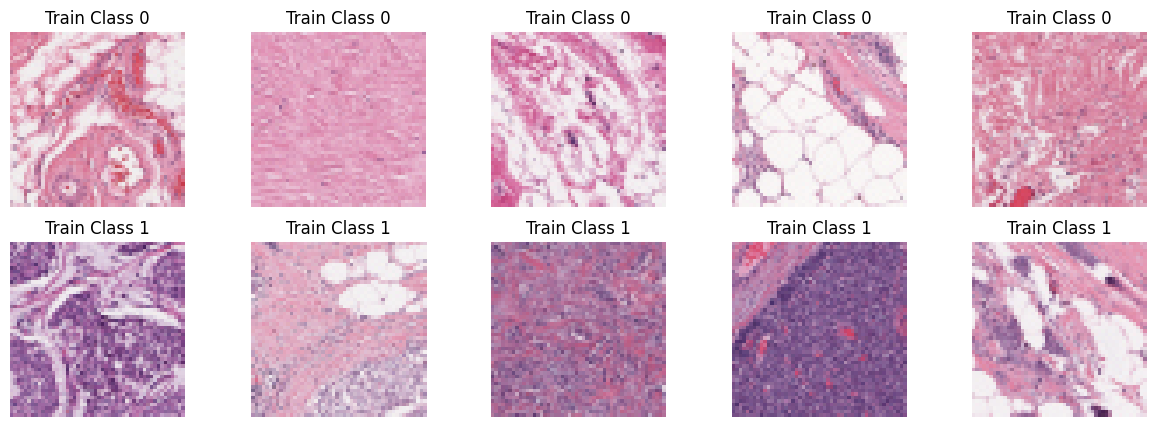

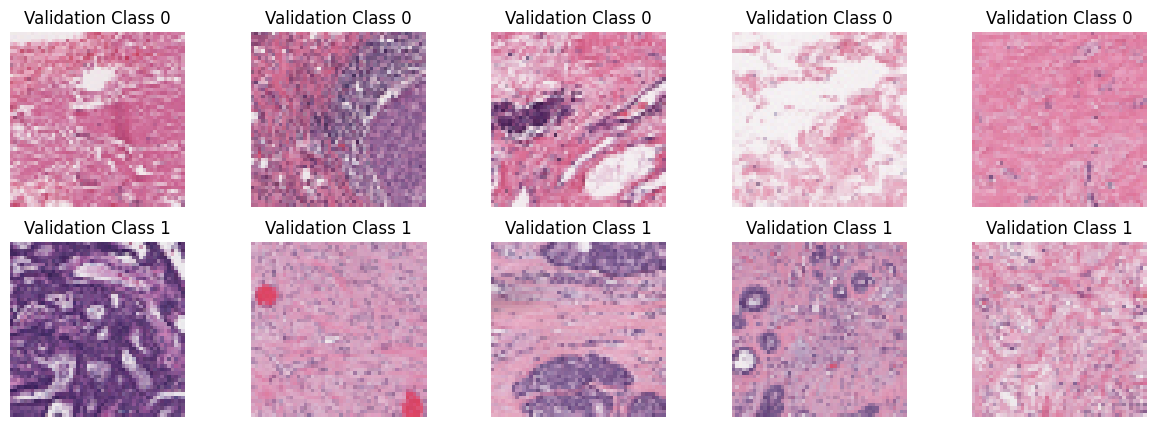

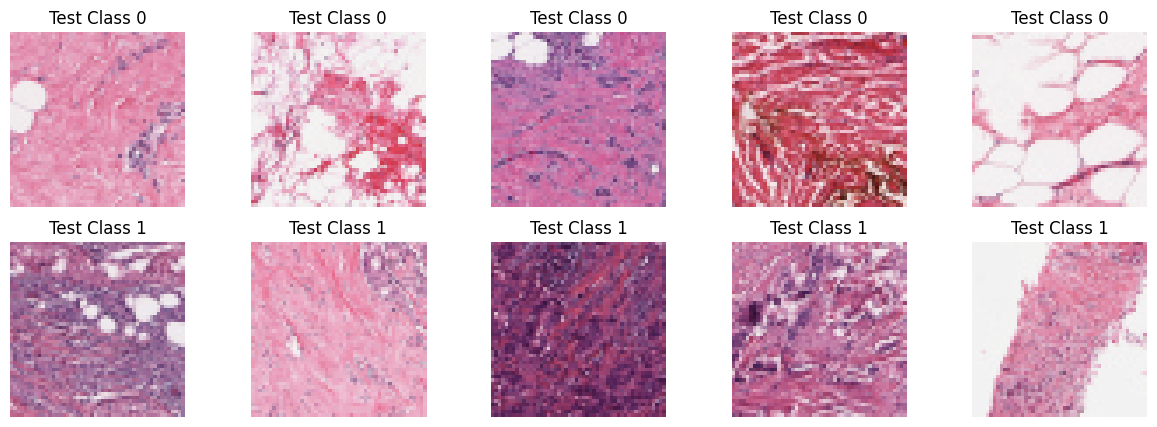

In [28]:
import matplotlib.pyplot as plt
import random
import cv2

def show_sample_images(base_dir, class_names=['0','1'], n=5, set_name="Train"):
    plt.figure(figsize=(15, 5))
    for idx, c in enumerate(class_names):
        class_path = os.path.join(base_dir, c)
        files = os.listdir(class_path)
        samples = random.sample(files, min(n, len(files)))
        for j, f in enumerate(samples):
            img_path = os.path.join(class_path, f)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(class_names), n, idx*n + j + 1)
            plt.imshow(img)
            plt.axis("off")
            plt.title(f"{set_name} Class {c}")
    plt.show()

# Show samples
show_sample_images(train_dir, set_name="Train")
show_sample_images(val_dir, set_name="Validation")
# Test might be empty now, so run only after you add data
show_sample_images(test_dir, set_name="Test")


In [17]:

# ============================
#  Oversample Minority Class in Training
# ============================
src_dir = os.path.join(train_dir, '1')
dest_dir = os.path.join(train_dir, '1_balanced')

os.makedirs(dest_dir, exist_ok=True)

files = os.listdir(src_dir)
majority_count = len(os.listdir(os.path.join(train_dir, '0')))
minority_count = len(files)
extra_needed = majority_count - minority_count

# Copy original minority images
for f in files:
    shutil.copy(os.path.join(src_dir, f), os.path.join(dest_dir, f))

# Add extra copies to balance
extra_files = random.choices(files, k=extra_needed)
for idx, f in enumerate(extra_files):
    shutil.copy(os.path.join(src_dir, f), os.path.join(dest_dir, f"extra{idx}_{f}"))

# Replace old minority folder
shutil.rmtree(src_dir)
os.rename(dest_dir, src_dir)

print("Oversampling done. Training set is now balanced.")

Oversampling done. Training set is now balanced.


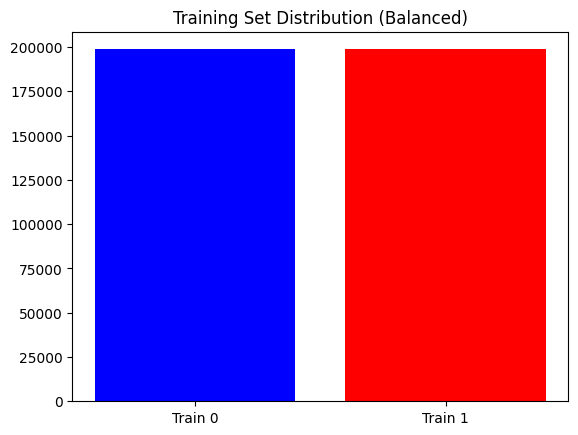

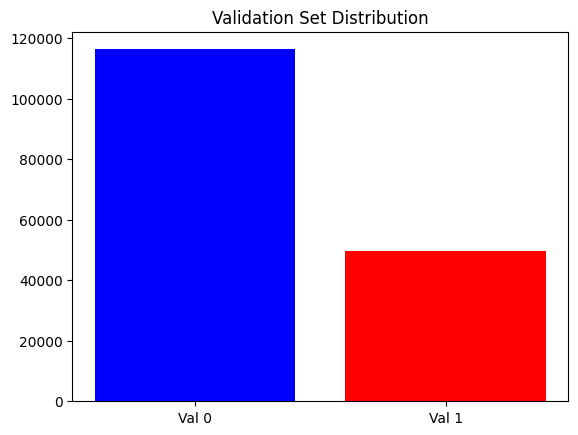

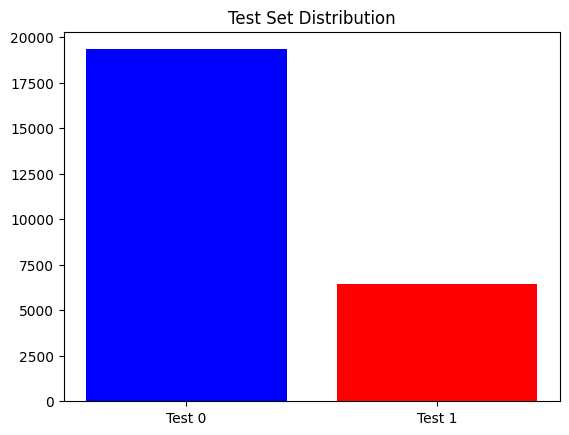

Train Non-IDC: 198738  | Train IDC: 198738
Val Non-IDC: 116304  | Val IDC: 49525
Test Non-IDC: 19331  | Test IDC: 6457


In [18]:

# ============================
#  Visualize Class Distribution
# ============================
import matplotlib.pyplot as plt

def count_images(path):
    return len(os.listdir(os.path.join(path,'0'))), len(os.listdir(os.path.join(path,'1')))

train_0, train_1 = count_images('./IDC_train')
val_0, val_1 = count_images('./IDC_val')
test_0, test_1 = count_images('./IDC_test')

plt.bar(['Train 0','Train 1'], [train_0,train_1], color=['blue','red'])
plt.title("Training Set Distribution (Balanced)")
plt.show()

plt.bar(['Val 0','Val 1'], [val_0,val_1], color=['blue','red'])
plt.title("Validation Set Distribution")
plt.show()

plt.bar(['Test 0','Test 1'], [test_0,test_1], color=['blue','red'])
plt.title("Test Set Distribution")
plt.show()

print("Train Non-IDC:", train_0, " | Train IDC:", train_1)
print("Val Non-IDC:", val_0, " | Val IDC:", val_1)
print("Test Non-IDC:", test_0, " | Test IDC:", test_1)



In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (50,50)
BATCH_SIZE = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    './IDC_train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    './IDC_val',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_gen = test_datagen.flow_from_directory(
    './IDC_test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 397476 images belonging to 2 classes.
Found 165829 images belonging to 2 classes.
Found 25788 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_custom_cnn(input_shape=(50,50,3)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Block 2
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Block 3
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Block 4
    model.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    # Global Average Pooling
    model.add(GlobalAveragePooling2D())

    # Dense
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    # Compile
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_custom_cnn()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 50, 50, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 6, 6, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             

 Total params: 618,017 (2.36 MB)

 Trainable params: 616,609 (2.35 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [22]:

# ============================
#  Training
# ============================
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
]

BATCH_SIZE = 128  # bigger batch
train_gen = train_datagen.flow_from_directory('./IDC_train', target_size=(50,50), batch_size=BATCH_SIZE, class_mode='binary')
val_gen = val_datagen.flow_from_directory('./IDC_val', target_size=(50,50), batch_size=BATCH_SIZE, class_mode='binary')

history = model.fit(
    train_gen,
    steps_per_epoch=200,  # sample 200 batches per epoch
    validation_data=val_gen,
    validation_steps=50,  # sample 50 val batches
    epochs=40,
    callbacks=callbacks
)



Found 397476 images belonging to 2 classes.
Found 165829 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 726s 4s/step - accuracy: 0.7765 - loss: 1.2066 - val_accuracy: 0.3128 - val_loss: 1.7495 - learning_rate: 0.0010
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 740s 4s/step - accuracy: 0.8224 - loss: 0.8943 - val_accuracy: 0.3703 - val_loss: 1.1474 - learning_rate: 0.0010
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 746s 4s/step - accuracy: 0.8360 - loss: 0.7008 - val_accuracy: 0.8375 - val_loss: 0.5956 - learning_rate: 0.0010
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 719s 4s/step - accuracy: 0.8409 - loss: 0.5861 - val_accuracy: 0.8580 - val_loss: 0.5113 - learning_rate: 0.0010
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.8512 - loss: 0.5034 - val_accuracy: 0.7714 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 751s 4s/step - accuracy: 0.8442 - loss: 0.4727 - val_accuracy: 0.8261 - val_loss: 0.4838 - learning_rate: 0.0010
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 718s 4s/step - accuracy: 0.8418 - loss: 0.

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.8461 - loss: 0.4063 - val_accuracy: 0.8123 - val_loss: 0.4749 - learning_rate: 0.0010
Epoch 17/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 802s 4s/step - accuracy: 0.8472 - loss: 0.4055 - val_accuracy: 0.7906 - val_loss: 0.5103 - learning_rate: 0.0010
Epoch 18/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 694s 3s/step - accuracy: 0.8523 - loss: 0.3878 - val_accuracy: 0.8730 - val_loss: 0.3520 - learning_rate: 3.0000e-04
Epoch 19/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 704s 4s/step - accuracy: 0.8595 - loss: 0.3711 - val_accuracy: 0.8598 - val_loss: 0.3685 - learning_rate: 3.0000e-04
Epoch 20/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 738s 4s/step - accuracy: 0.8642 - loss: 0.3672 - val_accuracy: 0.8722 - val_loss: 0.3294 - learning_rate: 3.0000e-04
Epoch 21/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 717s 4s/step - accuracy: 0.8666 - loss: 0.3526 - val_accuracy: 0.8684 - val_loss: 0.3381 - learning_rate: 3.0000e-04
Epoch 22/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 727s 4s/step - accuracy: 0.8664

403/403 ━━━━━━━━━━━━━━━━━━━━ 149s 369ms/step - accuracy: 0.9212 - loss: 0.2050
✅ Test Accuracy: 88.32%
403/403 ━━━━━━━━━━━━━━━━━━━━ 139s 346ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     19331
           1       0.78      0.75      0.76      6457

    accuracy                           0.88     25788
   macro avg       0.85      0.84      0.84     25788
weighted avg       0.88      0.88      0.88     25788



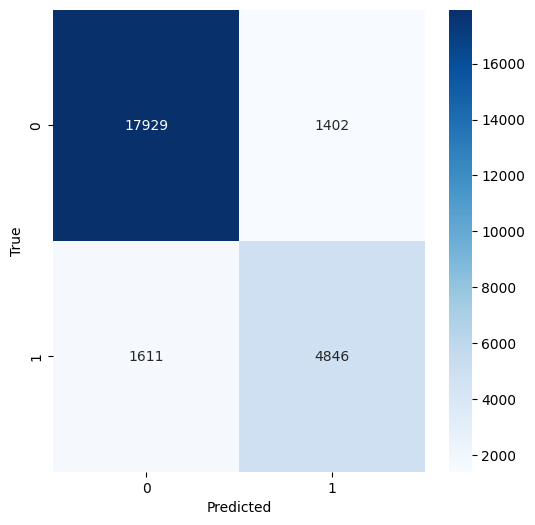

In [25]:
# ====================================
#  Evaluation
# ====================================
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

Y_pred = model.predict(test_gen)
y_pred = (Y_pred > 0.5).astype("int32").flatten()

# Need to define class_labels based on the order returned by flow_from_directory
class_labels = list(test_gen.class_indices.keys())

print("Classification Report:")
print(classification_report(test_gen.classes, y_pred, target_names=class_labels))

cm = confusion_matrix(test_gen.classes, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

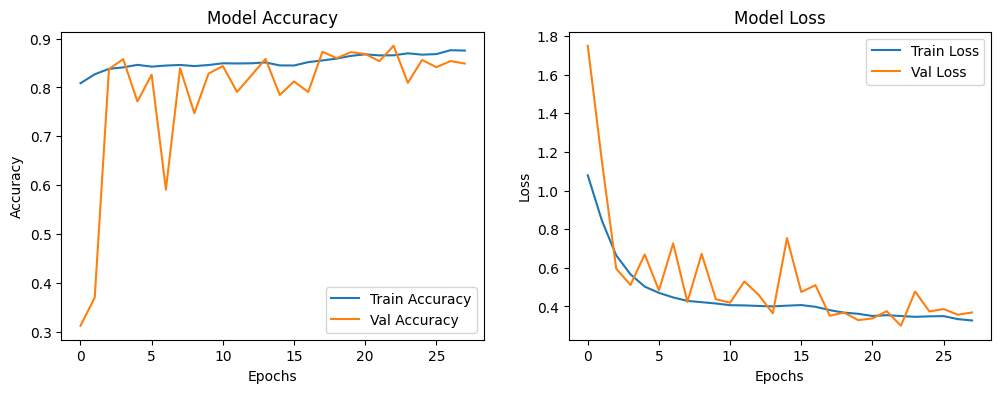

In [26]:
# --------------------------
# Plot training curves
# --------------------------
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [27]:
# Save the model in HDF5 format
model.save("IDC_Breast_Cancer_CNN.h5")

